# Bike Sharing Assignment - Multiple Linear Regression

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Problem Statement:

Bike shring company has contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Business Goal:

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## 1. Importing Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
plt.style.use('seaborn-paper')

## 2. Reading and understanding the dataset

In [2]:
#Reading csv file
bike_sharing=pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check the shape
bike_sharing.shape

(730, 16)

In [4]:
#check the datatype
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#check details of numerical variables
bike_sharing.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [6]:
#check null values in dataframe
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inference:

- `instant` is a unique identifier column. Year and month are provided in separate columns. Hence, `instant` and `dteday` columns can be dropped.
- `cnt` variable includes count of total rental bikes including both casual and registered. Hence, `casual` and `registered` columns can be dropped.
- Categorical variables such as `season`, `mnth`, `weekday` and `weathersit` have numeric values. We will encode them for better readability and suitable for regression model.
- Numerical variables such as `temp`, `atemp`, `hum`, `windspeed` and `cnt` will be analyzed separately 
- There are no missing values present in the data

### Cleaning the Data

In [7]:
#check columns in the dataframe
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# dropping variables - 'instant', 'dteday', 'casual', 'registered'
bike_sharing.drop(['instant', 'dteday', 'casual', 'registered'],axis=1,inplace=True)

In [9]:
#check first 5 rows 
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Categorical Variables are:
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

#### Inference:
- `yr`, `holiday` and `workingday` are represented as 0 and 1. Hence no need to encode further

### Handling Outliers

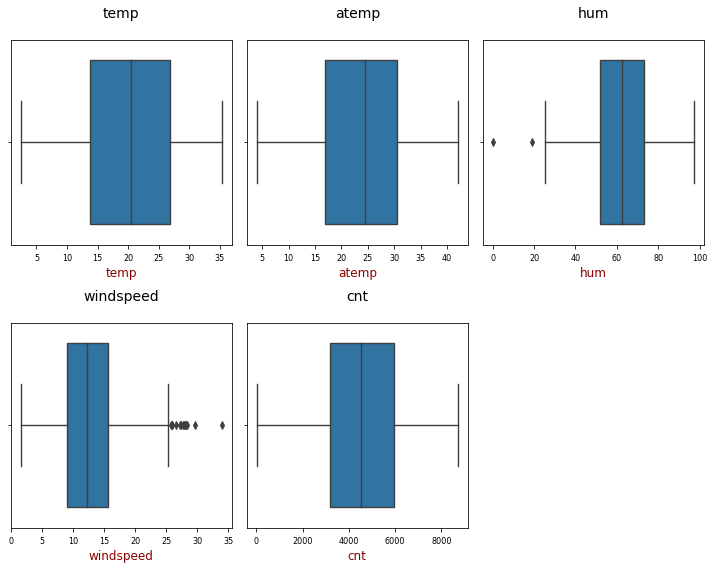

In [10]:
fig=plt.subplots(figsize=(10,8))

for i, j in enumerate(["temp", "atemp", "hum", "windspeed", "cnt"]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(bike_sharing[j])
    plt.title(j+'\n',fontsize=14)
    plt.xlabel(j,fontdict={'fontsize':12,'color':'DarkRed'})
    plt.tight_layout(pad=1.0)

- For Windspeed, we can see some outliers. We will consider 99 percentile for windspeed

In [11]:
bike_sharing = bike_sharing[(bike_sharing.windspeed < np.nanpercentile(bike_sharing.windspeed, 99))]
print(bike_sharing.shape)

(722, 12)


### Encoding Categorical variable

In [12]:
#Encoding 'season', 'mnth','weekday' and 'weathersit' with appropriate values
bike_sharing['season']=bike_sharing.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bike_sharing['mnth']=bike_sharing.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_sharing['weekday']=bike_sharing.weekday.replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike_sharing['weathersit']=bike_sharing.weathersit.replace({1:'Clear',2:'Cloudy',3:'Light Snow + Rain',4:'Heavy Rain + Thunderstorm'})


In [13]:
#check first 5 rows
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#check datatypes of encoded variables
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      722 non-null    object 
 1   yr          722 non-null    int64  
 2   mnth        722 non-null    object 
 3   holiday     722 non-null    int64  
 4   weekday     722 non-null    object 
 5   workingday  722 non-null    int64  
 6   weathersit  722 non-null    object 
 7   temp        722 non-null    float64
 8   atemp       722 non-null    float64
 9   hum         722 non-null    float64
 10  windspeed   722 non-null    float64
 11  cnt         722 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 73.3+ KB


## 3. Data Visualization

### Visualizing numerical data

In [15]:
#check columns
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

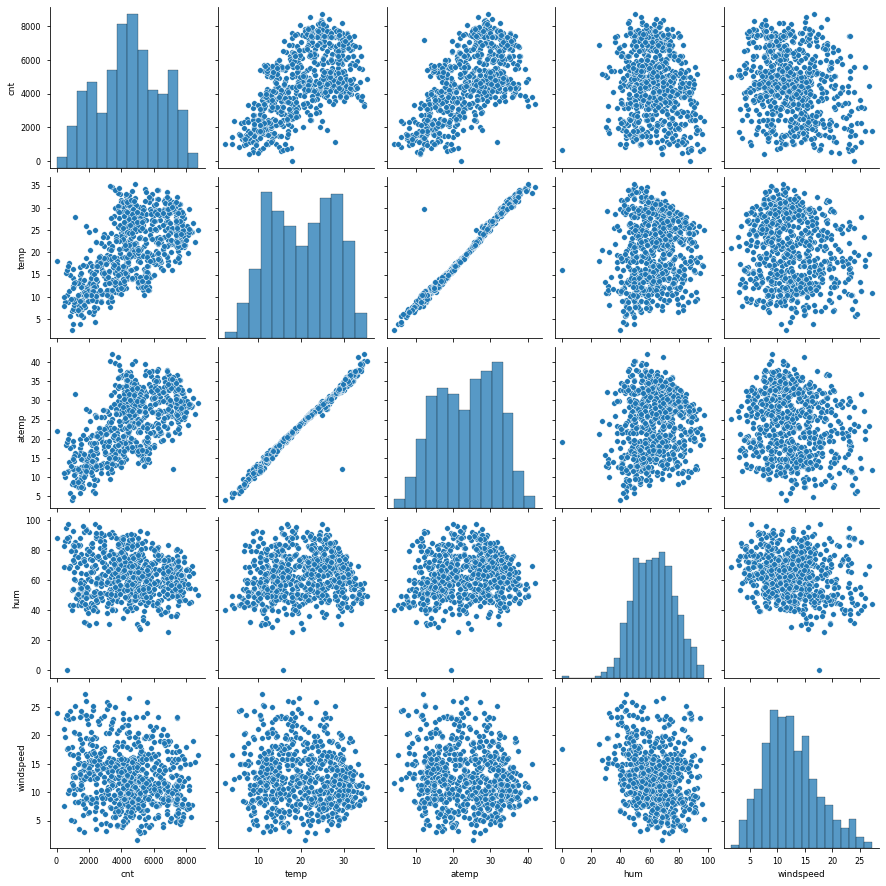

In [16]:
#pairplot to visualize numerical variables
sns.pairplot(data=bike_sharing,vars=['cnt','temp', 'atemp', 'hum', 'windspeed'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

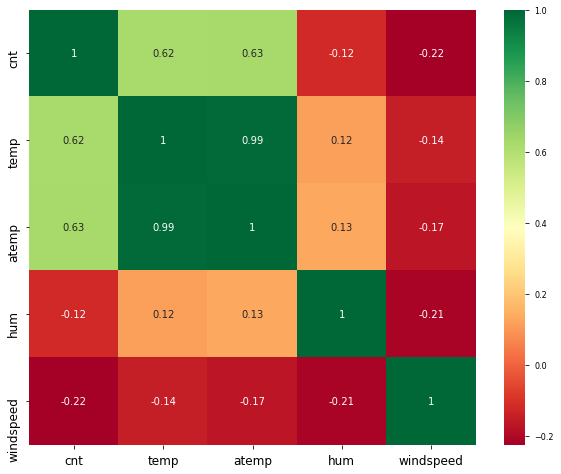

In [17]:
#heatmap to underastand correlation between numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(bike_sharing[['cnt','temp', 'atemp', 'hum', 'windspeed']].corr(),annot=True,cmap='RdYlGn')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Inference:

- `temp` and `atemp` have very high linear relationship with corelation coefficient as high as 0.99

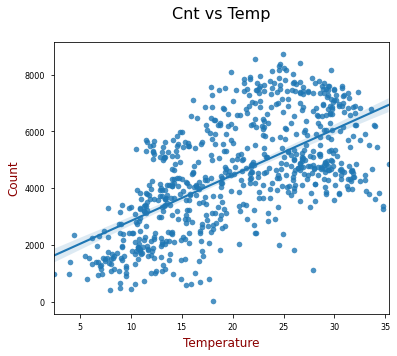

In [18]:
#cnt vs temp
plt.figure(figsize=(6,5))
plt.title("Cnt vs Temp\n",fontsize=16)
sns.regplot(data=bike_sharing,y="cnt",x="temp")
plt.xlabel("Temperature",fontdict={'fontsize':12,'color':'DarkRed'})
plt.ylabel("Count",fontdict={'fontsize':12,'color':'DarkRed'})
plt.show()

- We can see that cnt is linearly increasing with temp indicating linear relation.

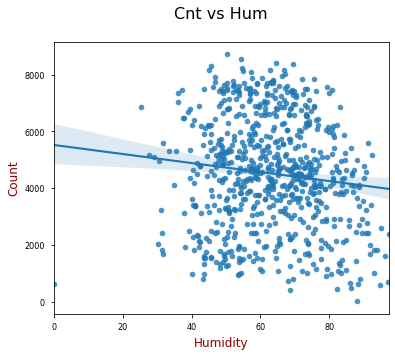

In [19]:
#cnt vs hunidity
plt.figure(figsize=(6,5))
plt.title("Cnt vs Hum\n",fontsize=16)
sns.regplot(data=bike_sharing,y="cnt",x="hum")
plt.xlabel("Humidity",fontdict={'fontsize':12,'color':'DarkRed'})
plt.ylabel("Count",fontdict={'fontsize':12,'color':'DarkRed'})
plt.show()


- Hum values are more scattered.
- Also we can see that count is decreasing with increase in humidity.

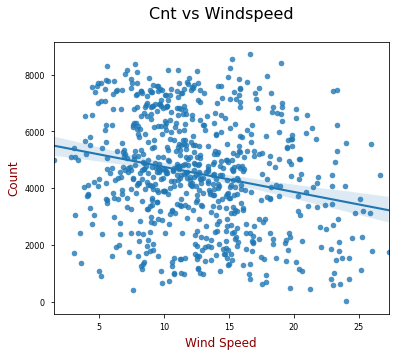

In [20]:
#cnt vs windspeed
plt.figure(figsize=(6,5))
plt.title("Cnt vs Windspeed\n",fontsize=16)
sns.regplot(data=bike_sharing,y="cnt",x="windspeed")
plt.xlabel("Wind Speed",fontdict={'fontsize':12,'color':'DarkRed'})
plt.ylabel("Count",fontdict={'fontsize':12,'color':'DarkRed'})
plt.show()

- Windspeed values are more scattered.
- Also we can see that count is decreasing with increase in windspeed.

### Visualizing data to find correlation between other numeric variables

<Figure size 1440x1080 with 0 Axes>

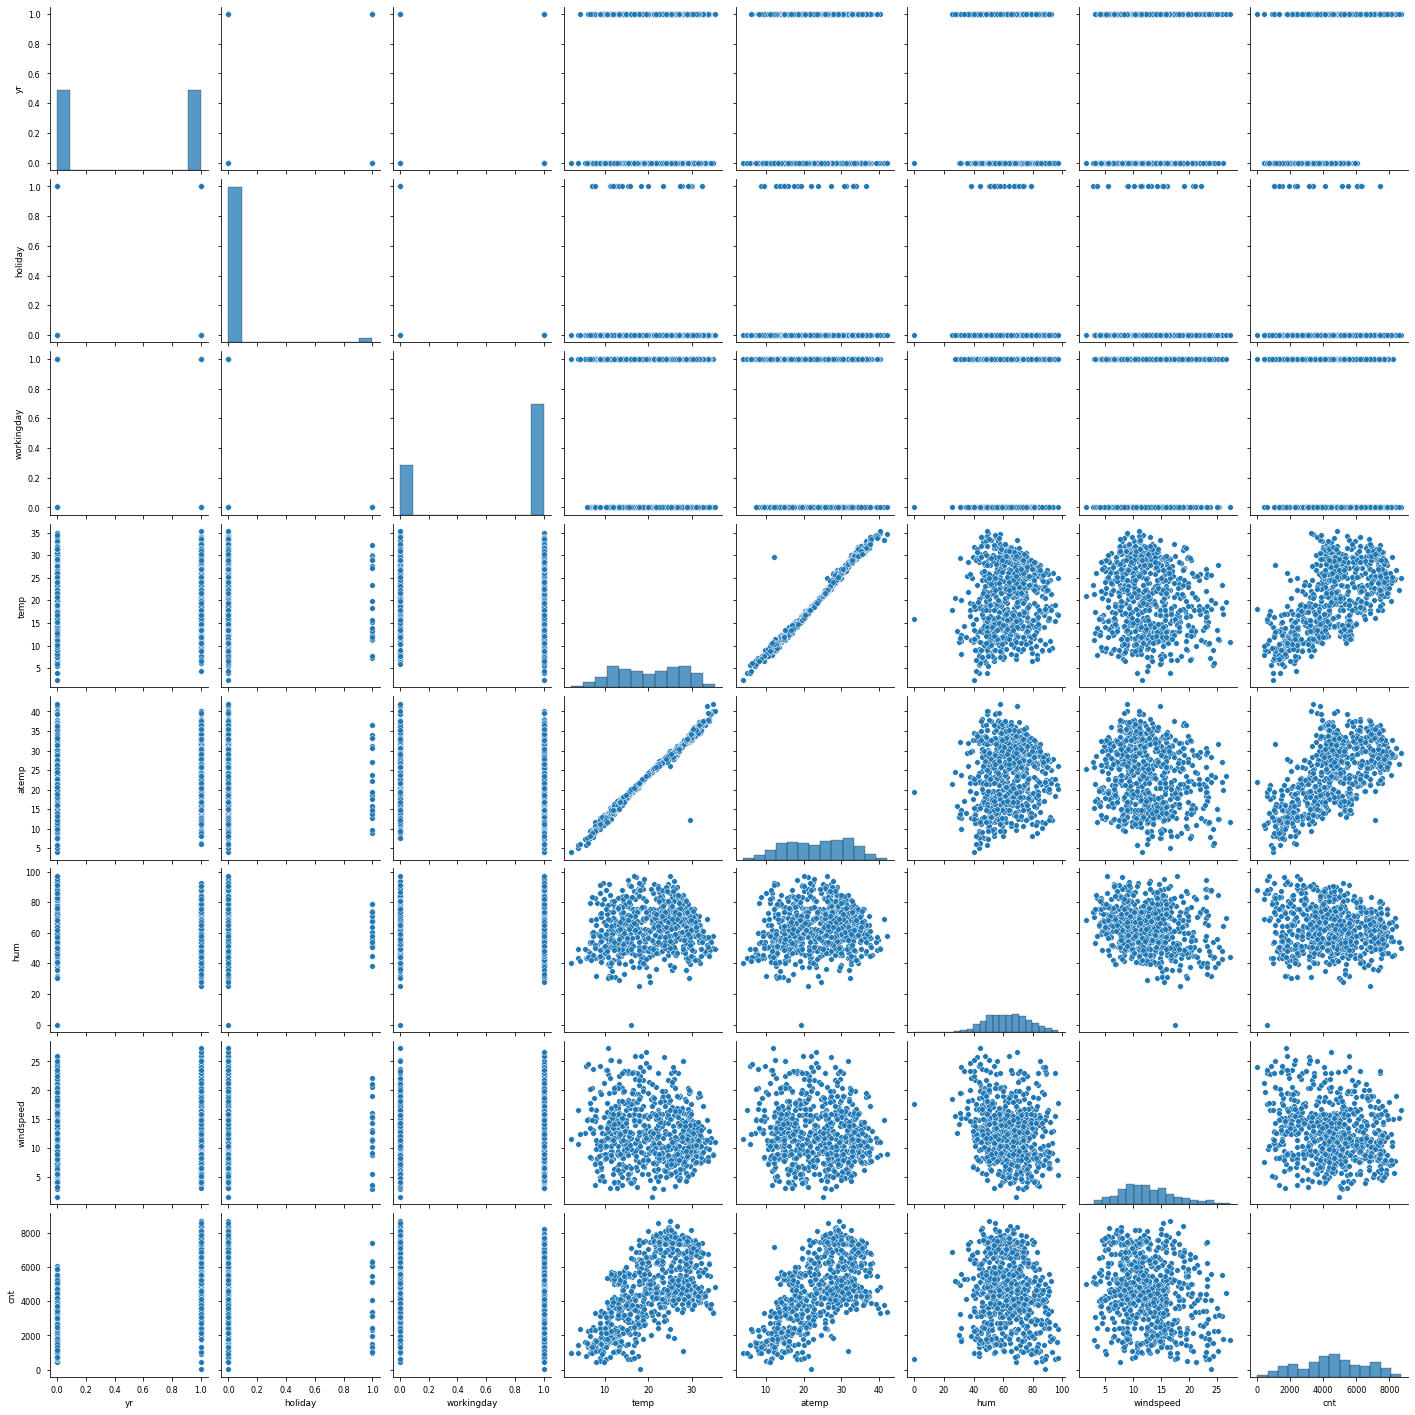

In [21]:
plt.figure(figsize=(20,15))
sns.pairplot(bike_sharing)
plt.show();

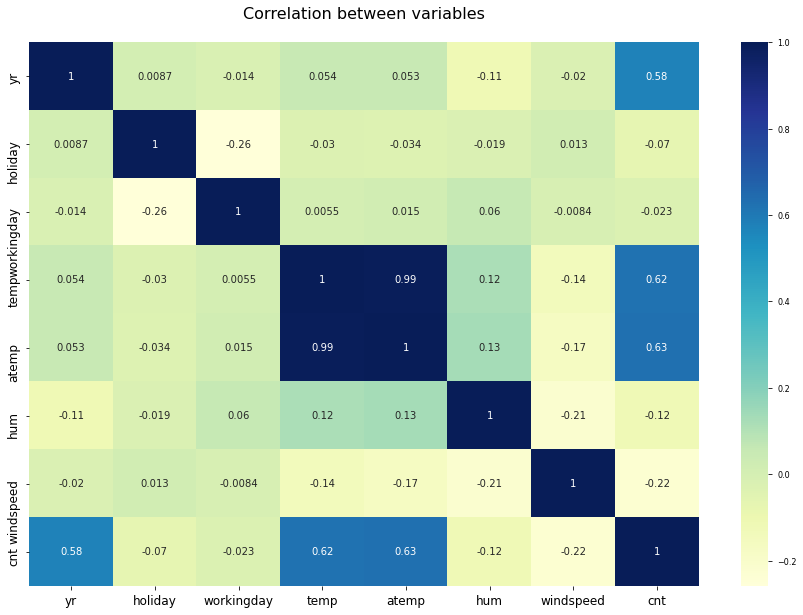

In [22]:
# heatmap of all variables
plt.figure(figsize=(15,10))
sns.heatmap(bike_sharing.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation between variables\n',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Inference:
- We can see that target variable `cnt` has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

### Visualizing categorical data

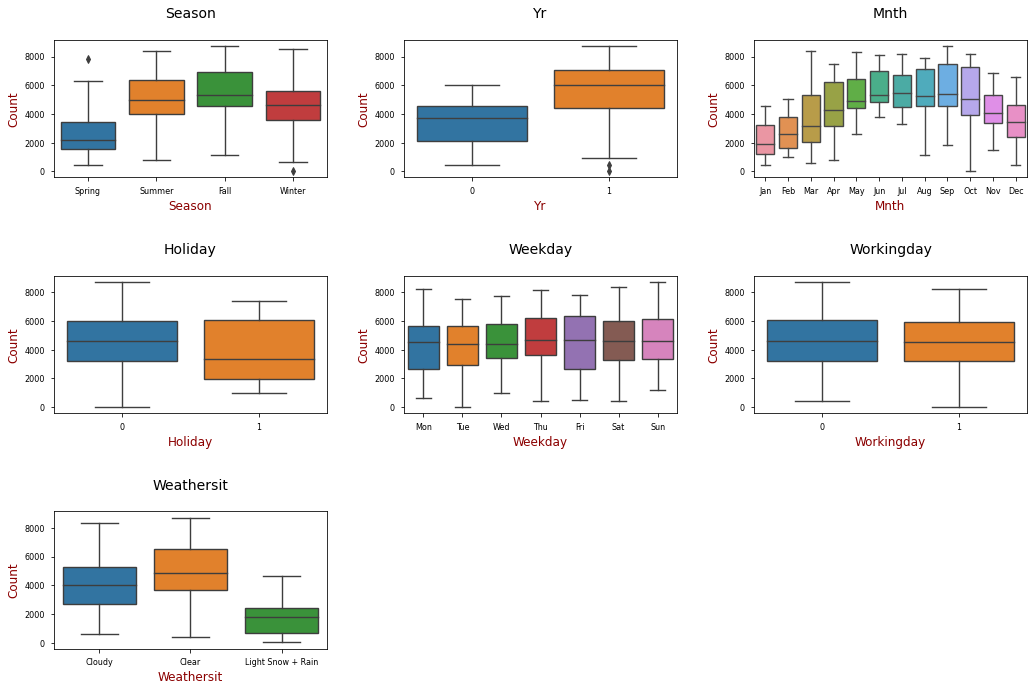

In [23]:
# visualizing categorical variables 
bike_sharing.columns
cols=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
plt.figure(figsize=(15,10))
for col in cols:
    plt.subplot(3,3,cols.index(col)+1)
    plt.tight_layout(pad=3.0)
    plt.title(col.capitalize()+'\n',fontsize=14)
    sns.boxplot(data=bike_sharing,y='cnt',x=col)
    plt.xlabel(col.capitalize(),fontdict={'fontsize':12,'color':'DarkRed'})
    plt.ylabel('Count',fontdict={'fontsize':12,'color':'DarkRed'})
    

#### Inference:

1.	`Season`: The demand for shared bikes is most likely to be higher in fall and least likely to be in spring
2.	`Year`: Demand of shared bikes has increased in 2019 than the previous year
3.	`Month`: Demand of shared bikes is less in the month of January, February, November and December than rest of the year. September has the highest demand
4.	`Holiday`: Bike demand is higher on non-holidays than on holidays
5.	`Weekday`: Bike demand is higher on Saturday and Sunday than on any other weekday. 
6.	`Workingday`: Bike demand is very similar whether its working day or not, working day has slightly less demand
7.	`Weathersit`: Highest demand of shared bikes is seen during clear day whereas Light Snow + Rain resulted in low demand. There is no demand during Heavy Rain + Thunderstorm.


## 4. Creating Dummy Variables

In [24]:
#converting into category datatype 
bike_sharing['season']=bike_sharing['season'].astype('category')
bike_sharing['mnth']=bike_sharing['mnth'].astype('category')
bike_sharing['weekday']=bike_sharing['weekday'].astype('category')
bike_sharing['weathersit']=bike_sharing['weathersit'].astype('category')

In [25]:
#creating dummy variables and dropping first variable
bike_sharing=pd.get_dummies(bike_sharing,drop_first=True)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Snow + Rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#checking shape
bike_sharing.shape

(722, 30)

## 5. Spliting data into train and test data

In [27]:
y=bike_sharing.pop('cnt')
X=bike_sharing

In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature scaling of numerical variables

In [29]:
#importing min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()
num_vars=['temp', 'atemp', 'hum', 'windspeed']
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_test[num_vars]=scaler.transform(X_test[num_vars])

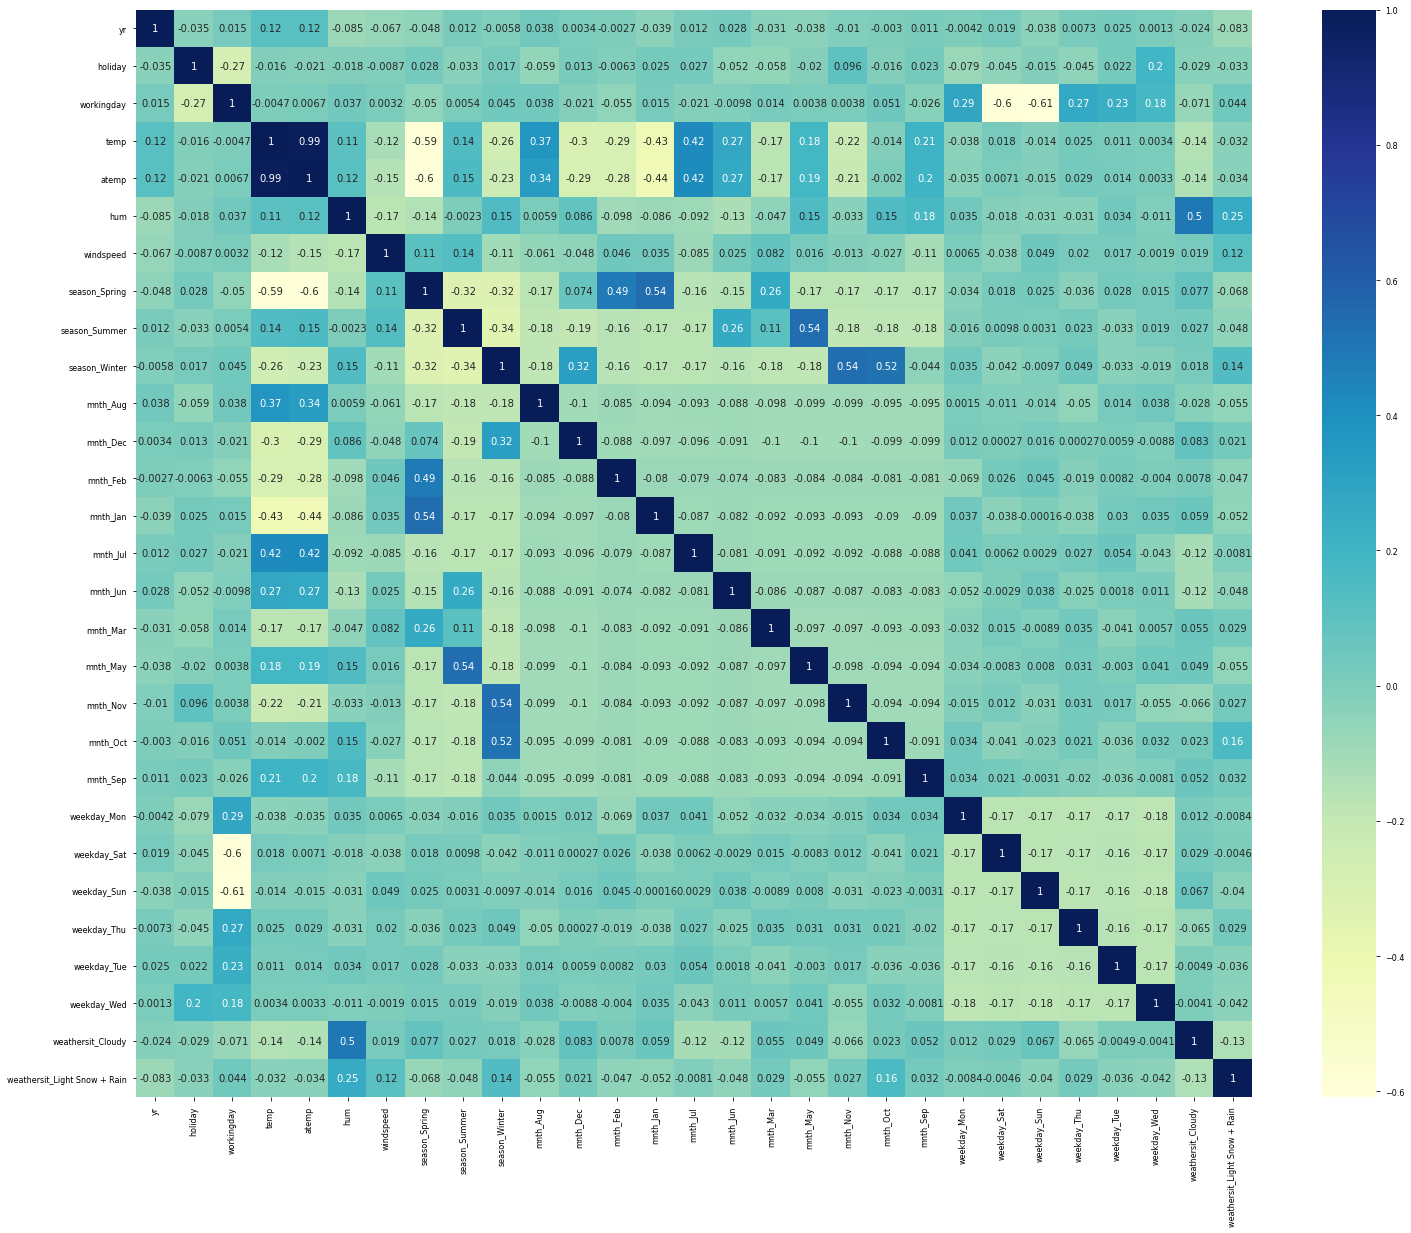

In [31]:
#heatmap of variables from training dataset
plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

## 6. Building Linear Regression Model

### Building model using statsmodel, for detailed statistics

In [32]:
#function to calculate Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_VIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [33]:
#function to build the model
import statsmodels.api as sm

def build_model(cols):
    #Adding a constant variable
    X_train_sm=sm.add_constant(X_train[cols])
    #Running the linear model
    lm=sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    print("="*100)
    cal_VIF(X_train_sm)

First, lets build a model containing all the features of training dataset

In [34]:
#this model contains all the features
X_train_sm=sm.add_constant(X_train)
lm=sm.OLS(y_train,X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     87.25
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          3.93e-170
Time:                        15:41:52   Log-Likelihood:                -4080.9
No. Observations:                 505   AIC:                             8222.
Df Residuals:                     475   BIC:                             8348.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [35]:
#calculating VIF
cal_VIF(X_train_sm)

                        Features     VIF
0                          const  363.48
4                           temp   64.56
5                          atemp   54.18
3                     workingday   47.82
24                   weekday_Sun   28.08
23                   weekday_Sat   27.93
8                  season_Spring   10.72
10                 season_Winter   10.11
9                  season_Summer    9.17
19                      mnth_Nov    7.10
12                      mnth_Dec    6.51
20                      mnth_Oct    6.37
11                      mnth_Aug    6.37
15                      mnth_Jul    5.94
2                        holiday    5.88
14                      mnth_Jan    5.72
21                      mnth_Sep    5.20
13                      mnth_Feb    4.60
17                      mnth_Mar    3.13
16                      mnth_Jun    2.53
18                      mnth_May    2.26
6                            hum    2.07
27                   weekday_Wed    1.97
22              

#### RFE

In [36]:
#importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Running RFE with the output number of variables equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [37]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 5),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 9),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Snow + Rain', True, 1)]

In [38]:
#features selected by RFE
columns=X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain'],
      dtype='object')

In [39]:
#Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

#### Model 1

In [40]:
#model with all the columns selected by RFE
build_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          5.61e-181
Time:                        15:41:52   Log-Likelihood:                -4090.0
No. Observations:                 505   AIC:                             8212.
Df Residuals:                     489   BIC:                             8280.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Model 2

In [41]:
#Dropping mnth_Jan
columns=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain']

In [42]:
build_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     176.9
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.87e-181
Time:                        15:41:53   Log-Likelihood:                -4092.0
No. Observations:                 505   AIC:                             8214.
Df Residuals:                     490   BIC:                             8277.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Model 3

In [43]:
#Dropping mnth_Dec
columns=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain']

In [44]:
build_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.01e-181
Time:                        15:41:53   Log-Likelihood:                -4093.7
No. Observations:                 505   AIC:                             8215.
Df Residuals:                     491   BIC:                             8275.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Model 4

In [45]:
#dropping mnth_Jul
columns=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain']

In [46]:
build_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          9.68e-182
Time:                        15:41:53   Log-Likelihood:                -4096.4
No. Observations:                 505   AIC:                             8219.
Df Residuals:                     492   BIC:                             8274.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Model 5

In [47]:
# Dropping the variable season_Spring
columns=['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_Summer', 'season_Winter',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain']

In [48]:
build_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     216.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          9.66e-181
Time:                        15:41:53   Log-Likelihood:                -4101.6
No. Observations:                 505   AIC:                             8227.
Df Residuals:                     493   BIC:                             8278.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Model 6

In [49]:
#dropping mnth_Nov
columns=['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_Summer', 'season_Winter',
        'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain']

In [50]:
build_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     236.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          3.77e-181
Time:                        15:41:53   Log-Likelihood:                -4103.4
No. Observations:                 505   AIC:                             8229.
Df Residuals:                     494   BIC:                             8275.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Model 7

In [51]:
#dropping hum as it has negative coefficient and is insignificant
columns=['yr', 'holiday', 'temp', 'windspeed',
       'season_Summer', 'season_Winter',
        'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Snow + Rain']

In [52]:
build_model(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     244.9
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          5.30e-176
Time:                        15:41:53   Log-Likelihood:                -4118.5
No. Observations:                 505   AIC:                             8257.
Df Residuals:                     495   BIC:                             8299.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Inference:
- All the features have VIF < 5, which ensures there is no collinearity.
- All the features have p-value < 0.05 (assumed significance level), hence all the features are important.
- Hence we would build our final model with the following features: `yr`, `holiday`, `temp`, `windspeed`, `season_Summer`, `season_Winter`,  `weathersit_Light Snow + Rain`,`mnth_Sep`, `weathersit_Cloudy`
- R2 is `0.817`. The difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

### Final Model

In [53]:
#build a final model with all selected features 
lr=LinearRegression()
lr.fit(X_train[columns],y_train)

LinearRegression()

In [54]:
#checking intercept and coefficients
print(lr.intercept_,lr.coef_)

1090.801859223141 [ 1928.18096587  -750.34201232  4879.31584778 -1006.65614521
   765.45328474  1082.00287573   858.9892576   -700.83172926
 -2419.48128866]


In [55]:
pd.DataFrame({'columns':X_train[columns].columns,'coefficients':lr.coef_})

,columns,coefficients
0,yr,1928.180966
1,holiday,-750.342012
2,temp,4879.315848
3,windspeed,-1006.656145
4,season_Summer,765.453285
5,season_Winter,1082.002876
6,mnth_Sep,858.989258
7,weathersit_Cloudy,-700.831729
8,weathersit_Light Snow + Rain,-2419.481289


## 7. Residual analysis

In [56]:
y_train_pred=lr.predict(X_train[columns])

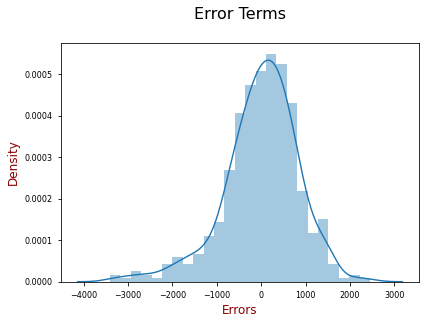

In [57]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms\n',fontsize=16)                  # Plot heading 
plt.xlabel('Errors', fontdict={'fontsize':12,'color':'DarkRed'})
plt.ylabel('Density', fontdict={'fontsize':12,'color':'DarkRed'});

#### Inference:
- Error terms are normally distributed with mean 0. Hence assumption of linear regression holds true.

## 8. Making Predictions using final model

### Linearity Check

In [58]:
y_test_pred=lr.predict(X_test[columns])

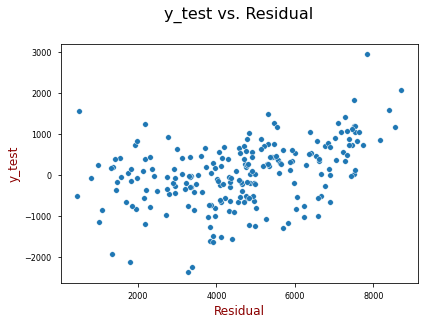

In [59]:
sns.scatterplot(y_test, (y_test-y_test_pred))
plt.title("y_test vs. Residual\n",fontsize=16)
plt.xlabel('Residual',fontdict={'fontsize':12,'color':'DarkRed'})
plt.ylabel('y_test',fontdict={'fontsize':12,'color':'DarkRed'})
plt.show()

#### Inference:
- There is no visible pattern in residual with change in y_test. Hence we can assume residual having constant variance/homoscedastic.

### Model Evaluation

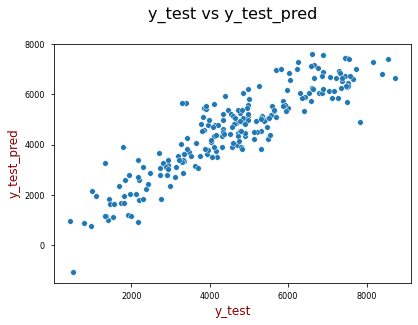

In [60]:
#Plotting y_test and y_pred to understand the spread
sns.scatterplot(y_test,y_test_pred)
plt.title('y_test vs y_test_pred\n',fontsize=16)
plt.xlabel('y_test',fontdict={'fontsize':12,'color':'DarkRed'})
plt.ylabel('y_test_pred',fontdict={'fontsize':12,'color':'DarkRed'})      
plt.show()

### MAE, MSE, RMSE

In [61]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 606.7345766821295
MSE: 612109.7239375423
RMSE: 782.3744141634121


### R2 - Score

In [62]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.8221510001238447


### Conclusion:

- Number of predictors in the final model are : 9


- The independent variables that are used in the final model are:
    
    1. yr
    2. holiday
    3. temp
    4. windspeed
    5. season_Summer
    6. season_Winter
    7. mnth_Sep
    8. weathersit_Cloudy
    9. weathersit_Light Snow + Rain'


- From this, the top 3 most important features are:
    
    1. temp : 4879.315848
    2. weathersit_Light Snow + Rain : -2419.481289
    3. Yr : 1928.180966


- The model is evaluated by R2_score. R2_score of `0.8221` means 82.21% of variance in the data is explained by the model. 